In [1]:
!pip install tensorflow keras matplotlib numpy pandas

In [3]:
!git clone https://github.com/maria-2025-senati/Precios_vivienda.git

Cloning into 'Precios_vivienda'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5023 - mae: 0.5267 - val_loss: 0.3154 - val_mae: 0.4013
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2833 - mae: 0.3835 - val_loss: 0.2987 - val_mae: 0.3845
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2566 - mae: 0.3614 - val_loss: 0.2777 - val_mae: 0.3688
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2486 - mae: 0.3517 - val_loss: 0.2677 - val_mae: 0.3658
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2516 - mae: 0.3525 - val_loss: 0.2597 - val_mae: 0.3559
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2266 - mae: 0.3357 - val_loss: 0.2610 - val_mae: 0.3462
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2355 - mae: 0.3375 - val_loss: 0.2497 - val_mae: 0.3433
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2249 - mae: 0.3306 - val_loss: 0.2455 - val_mae: 0.3409
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

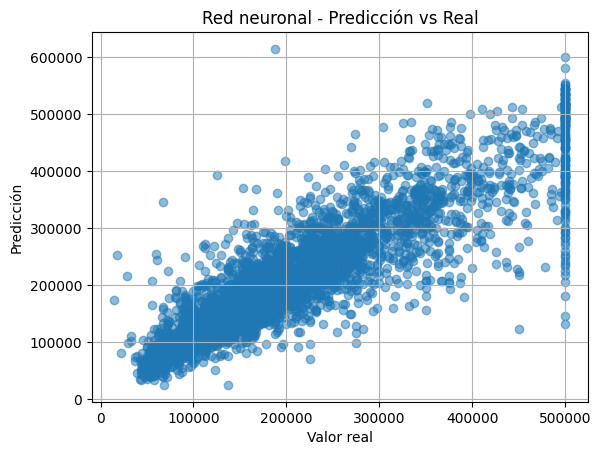

In [33]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras

# 2. Cargar y preparar datos
df = pd.read_csv("housing.csv")

# 3. Eliminar columnas no numéricas
df = df.drop(columns=["ocean_proximity"])  # columna categórica

# 4. Imputar NaNs con la media
df = df.fillna(df.mean(numeric_only=True))

# 5. Separar características y variable objetivo
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

# 6. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Escalar características
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 8. Escalar etiquetas
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# 9. Crear modelo de red neuronal usando keras.Input para la forma de entrada
model = keras.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 10. Entrenar modelo
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50, verbose=1)

# 11. Predecir con modelo
y_pred_scaled = model.predict(X_test_scaled).flatten()

# 12. Verificar valores nulos
print("¿Hay NaNs en y_pred_scaled?", np.any(np.isnan(y_pred_scaled)))
print("¿Hay NaNs en X_test_scaled?", np.any(np.isnan(X_test_scaled)))

# 13. Eliminar predicciones con NaN
mask = ~np.isnan(y_pred_scaled)
y_pred_scaled_clean = y_pred_scaled[mask]
y_test_scaled_clean = y_test_scaled[mask]

# 14. Inversión del escalado
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled_clean.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test_scaled_clean.reshape(-1, 1)).flatten()

# 15. Calcular MAE
mae_real = mean_absolute_error(y_test_orig, y_pred_orig)
print(f"\nMAE sin NaNs: {mae_real:.2f}")

# 16. Graficar resultados
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Red neuronal - Predicción vs Real")
plt.grid(True)
plt.show()

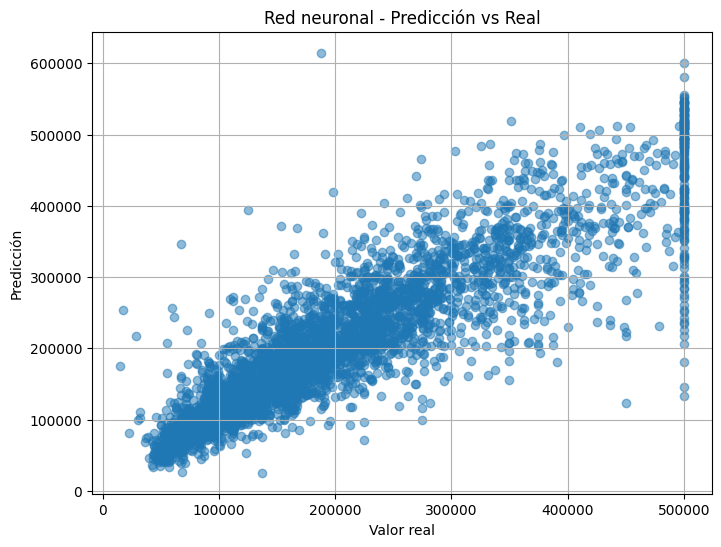

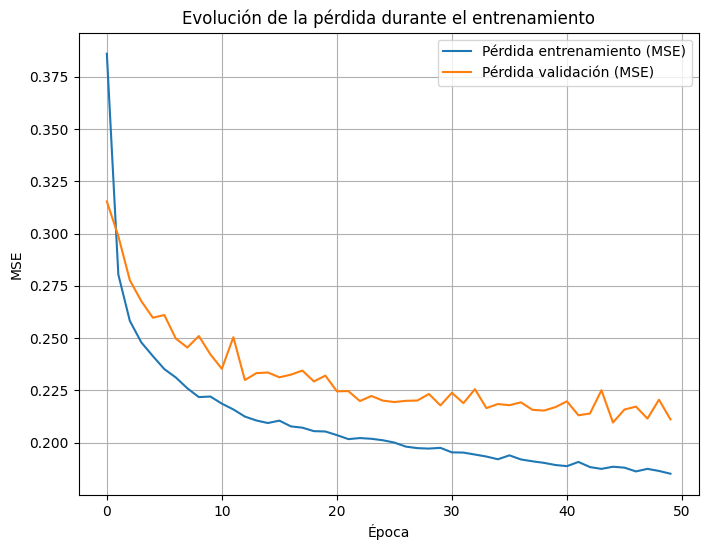

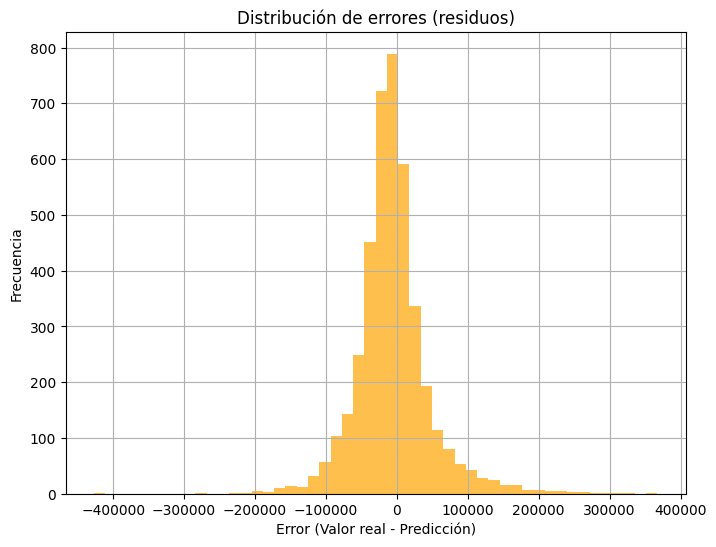

In [34]:
import matplotlib.pyplot as plt

# a) Scatter plot: Predicción vs Real
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Red neuronal - Predicción vs Real")
plt.grid(True)
plt.show()

# b) Gráfico de pérdida durante entrenamiento y validación
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Pérdida entrenamiento (MSE)')
plt.plot(history.history['val_loss'], label='Pérdida validación (MSE)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# c) Histograma de errores (residuos)
errores = y_test_orig - y_pred_orig
plt.figure(figsize=(8,6))
plt.hist(errores, bins=50, alpha=0.7, color='orange')
plt.xlabel('Error (Valor real - Predicción)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores (residuos)')
plt.grid(True)
plt.show()
